In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv("Iris .csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df["Species"] = LabelEncoder().fit_transform(df["Species"])

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


<Axes: >

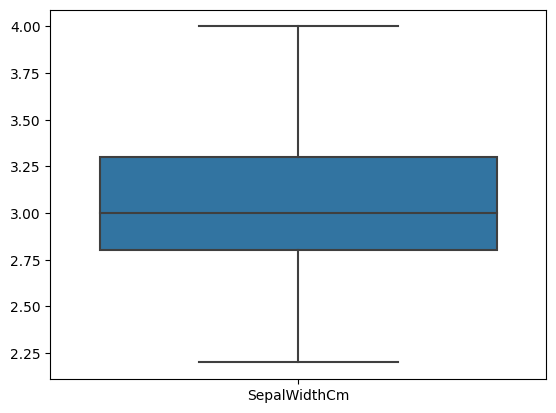

In [25]:
sns.boxplot(df[["SepalWidthCm"]])

In [13]:
Q1 = df.quantile(0.25)["SepalWidthCm"]
Q3 = df.quantile(0.75)["SepalWidthCm"]

In [15]:
IQR = Q3 - Q1
ll = Q1 - (1.5 * IQR)
ul = Q3 + (1.5 * IQR)

In [26]:
df["SepalWidthCm"][(df["SepalWidthCm"] < ll)] = df["SepalWidthCm"].median()
df["SepalWidthCm"][(df["SepalWidthCm"] > ul)] = df["SepalWidthCm"].median()

/tmp/ipykernel_47129/4142882420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SepalWidthCm"][(df["SepalWidthCm"] < ll)] = df["SepalWidthCm"].median()
/tmp/ipykernel_47129/4142882420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SepalWidthCm"][(df["SepalWidthCm"] > ul)] = df["SepalWidthCm"].median()


In [28]:
df[["SepalWidthCm", "SepalLengthCm", "PetalLengthCm", "PetalWidthCm"]] = StandardScaler().fit_transform(df[["SepalWidthCm", "SepalLengthCm", "PetalLengthCm", "PetalWidthCm"]])

In [29]:
x = df[["SepalWidthCm", "SepalLengthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)

In [30]:
model = GaussianNB().fit(x_train, y_train)

In [31]:
result = model.predict(x_test)

In [36]:
cm = confusion_matrix(y_test, result)
cm

array([[11,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 10]])

In [37]:
def getScore(tp, fn, fp, tn):
    print(f"Accuracy : {(tp + tn)/(tp + tn + fp + fn)}")
    print(f"Error rate : {(fp + fn)/(tp + tn + fp + fn)}")
    print(f"Precision: {(tp/(tp+fp))}")
    print(f"Recall: {tp/(tp+fn)}")

In [38]:
#for Iris-setosa
tp = cm[0][0]
tn = cm[1][1] + cm[1][2] + cm[2][1] + cm[2][2]
fp = cm[1][0] + cm[2][0]
fn = cm[0][1] + cm[0][2]
getScore(tp, fn, fp, tn)

Accuracy : 1.0
Error rate : 0.0
Precision: 1.0
Recall: 1.0


In [39]:
tp = cm[1][1]
tn = cm[0][0] + cm[2][2] + cm[2][0] + cm[0][2]
fn = cm[1][0] + cm[1][2]
fp = cm[0][1] + cm[2][1]
getScore(tp, fn, fp, tn)

Accuracy : 0.9210526315789473
Error rate : 0.07894736842105263
Precision: 0.9333333333333333
Recall: 0.875


In [40]:
tp = cm[2][2]
tn = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
fn = cm[2][0] + cm[2][1]
fp = cm[0][2] + cm[1][2]
getScore(tp, fn, fp, tn)

Accuracy : 0.9210526315789473
Error rate : 0.07894736842105263
Precision: 0.8333333333333334
Recall: 0.9090909090909091


In [41]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.88      0.90        16
           2       0.83      0.91      0.87        11

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.92      0.92      0.92        38

